In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [36]:
data = pd.read_csv("sem_duplicadas.csv", sep=",")
data = data.set_index(data.columns[0]).reset_index(drop=True)
print(data.shape)

(122938, 269)


In [37]:
data.head(5)

,semestre,prefixo,CMSS_GDP,NM_CMSS_GDP,ref_org,pontos_oi,qt_oi,qt_oi_proced,qt_oi_nao_proced,nps,qt_enps_respostas,qt_critico_enps,dedips_andamento_mtn,dedips_concluidas_mtn,dedips_andamento_ilicito,dedips_concluidas_ilicito,dedips_andamento_leve,dedips_concluidas_leve,dedips_andamento_grave,dedips_concluidas_grave,placar_gdp_comp,placar_gdp_final,qt_diag_conceitos_coerentes,qt_diag_respostas,qt_discordancia_feedback,qt_avaliados_gdp,ascen_mesmo_pref,ascen_outro_pref,ascen,descen_mesmo_pref,descen_outro_pref,descen,lateral,NOTA_SUBS_5,NOTA_SUBS_4,NOTA_SUBS_3,NOTA_SUBS_2,NOTA_SUBS_1,QT_NOTAS_SUBS,NOTA_AUTO_5,NOTA_AUTO_4,NOTA_AUTO_3,NOTA_AUTO_2,NOTA_AUTO_1,QT_NOTAS_AUTO,NOTA_GESTOR_5,NOTA_GESTOR_4,NOTA_GESTOR_3,NOTA_GESTOR_2,NOTA_GESTOR_1,QT_NOTAS_GESTOR,pit,qt_anots_recon,qt_anots_aprim,qt_funci_anot_rec,qt_funci_anot_apr,qt_subords_pref,pontos_oi_prefixo,qt_oi_prefixo,qt_oi_proced_prefixo,qt_oi_nao_proced_prefixo,pref_dedips_andamento_mtn,pref_dedips_concluidas_mtn,pref_dedips_andamento_ilicito,pref_dedips_concluidas_ilicito,pref_dedips_andamento_leve,pref_dedips_concluidas_leve,pref_dedips_andamento_grave,pref_dedips_concluidas_grave,PLACAR_FINAL_CNX,PLACAR_MOB_CNX,PLACAR_AVAL_CNX,absenteismo,melhorias_insignificante,agravamento_insignificante,manutencao_insignificante,total_insignificante,melhorias_alerta,agravamento_alerta,manutencao_alerta,total_alerta,melhorias_resistencia,agravamento_resistencia,manutencao_resistencia,total_resistencia,melhorias_exaustao,agravamento_exaustao,manutencao_exaustao,total_exaustao,total_respostas_estresse,prefixo_regional,reg_melhorias_insignificante,reg_agravamento_insignificante,reg_manutencao_insignificante,reg_total_insignificante,reg_melhorias_alerta,reg_agravamento_alerta,reg_manutencao_alerta,reg_total_alerta,reg_melhorias_resistencia,reg_agravamento_resistencia,reg_manutencao_resistencia,reg_total_resistencia,reg_melhorias_exaustao,reg_agravamento_exaustao,reg_manutencao_exaustao,reg_total_exaustao,prefixo_super,super_melhorias_insignificante,super_agravamento_insignificante,super_manutencao_insignificante,super_total_insignificante,super_melhorias_alerta,super_agravamento_alerta,super_manutencao_alerta,super_total_alerta,super_melhorias_resistencia,super_agravamento_resistencia,super_manutencao_resistencia,super_total_resistencia,super_melhorias_exaustao,super_agravamento_exaustao,super_manutencao_exaustao,super_total_exaustao,prefixo_diretoria,dir_melhorias_insignificante,dir_agravamento_insignificante,dir_manutencao_insignificante,dir_total_insignificante,dir_melhorias_alerta,dir_agravamento_alerta,dir_manutencao_alerta,dir_total_alerta,dir_melhorias_resistencia,dir_agravamento_resistencia,dir_manutencao_resistencia,dir_total_resistencia,dir_melhorias_exaustao,dir_agravamento_exaustao,dir_manutencao_exaustao,dir_total_exaustao,prefixo_vp,vp_melhorias_insignificante,vp_agravamento_insignificante,vp_manutencao_insignificante,vp_total_insignificante,vp_melhorias_alerta,vp_agravamento_alerta,vp_manutencao_alerta,vp_total_alerta,vp_melhorias_resistencia,vp_agravamento_resistencia,vp_manutencao_resistencia,vp_total_resistencia,vp_melhorias_exaustao,vp_agravamento_exaustao,vp_manutencao_exaustao,vp_total_exaustao,enps_nota_prefixo,qt_enps_respostas_prefixo,qt_critico_enps_pref,qtd_cat_pref,enps_regional,enps_super,enps_diretoria,enps_vp,qt_subords_jrdc,jrdc_pontos_oi_prefixo,jrdc_qt_oi_prefixo,jrdc_qt_oi_proced_prefixo,jrdc_qt_oi_nao_proced_prefixo,jrdc_dedips_andamento_mtn,jrdc_dedips_concluidas_mtn,jrdc_dedips_andamento_ilicito,jrdc_dedips_concluidas_ilicito,jrdc_dedips_andamento_leve,jrdc_dedips_concluidas_leve,jrdc_dedips_andamento_grave,jrdc_dedips_concluidas_grave,jrdc_absenteismo,jrdc_melhorias_insignificante,jrdc_agravamento_insignificante,jrdc_manutencao_insignificante,jrdc_total_insignificante,jrdc_melhorias_alerta,jrdc_agravamento_alerta,jrdc_manutencao_alerta,jrdc_total_alerta,jrdc_melhorias_resistencia,jrdc_agravamento_resistencia,jrdc_manutencao_resistencia,jrdc_total_resist

In [38]:
data = data.fillna(0)
data_previo = data
data_previo.head(5)

,semestre,prefixo,CMSS_GDP,NM_CMSS_GDP,ref_org,pontos_oi,qt_oi,qt_oi_proced,qt_oi_nao_proced,nps,qt_enps_respostas,qt_critico_enps,dedips_andamento_mtn,dedips_concluidas_mtn,dedips_andamento_ilicito,dedips_concluidas_ilicito,dedips_andamento_leve,dedips_concluidas_leve,dedips_andamento_grave,dedips_concluidas_grave,placar_gdp_comp,placar_gdp_final,qt_diag_conceitos_coerentes,qt_diag_respostas,qt_discordancia_feedback,qt_avaliados_gdp,ascen_mesmo_pref,ascen_outro_pref,ascen,descen_mesmo_pref,descen_outro_pref,descen,lateral,NOTA_SUBS_5,NOTA_SUBS_4,NOTA_SUBS_3,NOTA_SUBS_2,NOTA_SUBS_1,QT_NOTAS_SUBS,NOTA_AUTO_5,NOTA_AUTO_4,NOTA_AUTO_3,NOTA_AUTO_2,NOTA_AUTO_1,QT_NOTAS_AUTO,NOTA_GESTOR_5,NOTA_GESTOR_4,NOTA_GESTOR_3,NOTA_GESTOR_2,NOTA_GESTOR_1,QT_NOTAS_GESTOR,pit,qt_anots_recon,qt_anots_aprim,qt_funci_anot_rec,qt_funci_anot_apr,qt_subords_pref,pontos_oi_prefixo,qt_oi_prefixo,qt_oi_proced_prefixo,qt_oi_nao_proced_prefixo,pref_dedips_andamento_mtn,pref_dedips_concluidas_mtn,pref_dedips_andamento_ilicito,pref_dedips_concluidas_ilicito,pref_dedips_andamento_leve,pref_dedips_concluidas_leve,pref_dedips_andamento_grave,pref_dedips_concluidas_grave,PLACAR_FINAL_CNX,PLACAR_MOB_CNX,PLACAR_AVAL_CNX,absenteismo,melhorias_insignificante,agravamento_insignificante,manutencao_insignificante,total_insignificante,melhorias_alerta,agravamento_alerta,manutencao_alerta,total_alerta,melhorias_resistencia,agravamento_resistencia,manutencao_resistencia,total_resistencia,melhorias_exaustao,agravamento_exaustao,manutencao_exaustao,total_exaustao,total_respostas_estresse,prefixo_regional,reg_melhorias_insignificante,reg_agravamento_insignificante,reg_manutencao_insignificante,reg_total_insignificante,reg_melhorias_alerta,reg_agravamento_alerta,reg_manutencao_alerta,reg_total_alerta,reg_melhorias_resistencia,reg_agravamento_resistencia,reg_manutencao_resistencia,reg_total_resistencia,reg_melhorias_exaustao,reg_agravamento_exaustao,reg_manutencao_exaustao,reg_total_exaustao,prefixo_super,super_melhorias_insignificante,super_agravamento_insignificante,super_manutencao_insignificante,super_total_insignificante,super_melhorias_alerta,super_agravamento_alerta,super_manutencao_alerta,super_total_alerta,super_melhorias_resistencia,super_agravamento_resistencia,super_manutencao_resistencia,super_total_resistencia,super_melhorias_exaustao,super_agravamento_exaustao,super_manutencao_exaustao,super_total_exaustao,prefixo_diretoria,dir_melhorias_insignificante,dir_agravamento_insignificante,dir_manutencao_insignificante,dir_total_insignificante,dir_melhorias_alerta,dir_agravamento_alerta,dir_manutencao_alerta,dir_total_alerta,dir_melhorias_resistencia,dir_agravamento_resistencia,dir_manutencao_resistencia,dir_total_resistencia,dir_melhorias_exaustao,dir_agravamento_exaustao,dir_manutencao_exaustao,dir_total_exaustao,prefixo_vp,vp_melhorias_insignificante,vp_agravamento_insignificante,vp_manutencao_insignificante,vp_total_insignificante,vp_melhorias_alerta,vp_agravamento_alerta,vp_manutencao_alerta,vp_total_alerta,vp_melhorias_resistencia,vp_agravamento_resistencia,vp_manutencao_resistencia,vp_total_resistencia,vp_melhorias_exaustao,vp_agravamento_exaustao,vp_manutencao_exaustao,vp_total_exaustao,enps_nota_prefixo,qt_enps_respostas_prefixo,qt_critico_enps_pref,qtd_cat_pref,enps_regional,enps_super,enps_diretoria,enps_vp,qt_subords_jrdc,jrdc_pontos_oi_prefixo,jrdc_qt_oi_prefixo,jrdc_qt_oi_proced_prefixo,jrdc_qt_oi_nao_proced_prefixo,jrdc_dedips_andamento_mtn,jrdc_dedips_concluidas_mtn,jrdc_dedips_andamento_ilicito,jrdc_dedips_concluidas_ilicito,jrdc_dedips_andamento_leve,jrdc_dedips_concluidas_leve,jrdc_dedips_andamento_grave,jrdc_dedips_concluidas_grave,jrdc_absenteismo,jrdc_melhorias_insignificante,jrdc_agravamento_insignificante,jrdc_manutencao_insignificante,jrdc_total_insignificante,jrdc_melhorias_alerta,jrdc_agravamento_alerta,jrdc_manutencao_alerta,jrdc_total_alerta,jrdc_melhorias_resistencia,jrdc_agravamento_resistencia,jrdc_manutencao_resistencia,jrdc_total_resist

In [39]:
cols_drop = ['semestre', 'prefixo', 'NM_CMSS_GDP', 'ref_org', 'pit']
data.drop(columns=cols_drop, axis=1, inplace=True)
feature_names = data.columns
data.shape

(122938, 264)

In [40]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [41]:
# Clustering com K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

C:\Users\LR558EQ\OneDrive - EY\Documents\virtual_env_python\ambienteTreinamento\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
# Adiciona os rótulos dos clusters ao DataFrame original
data['Cluster'] = clusters

In [43]:
# Visualização com PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
data['PCA1'] = principal_components[:, 0]
data['PCA2'] = principal_components[:, 1]

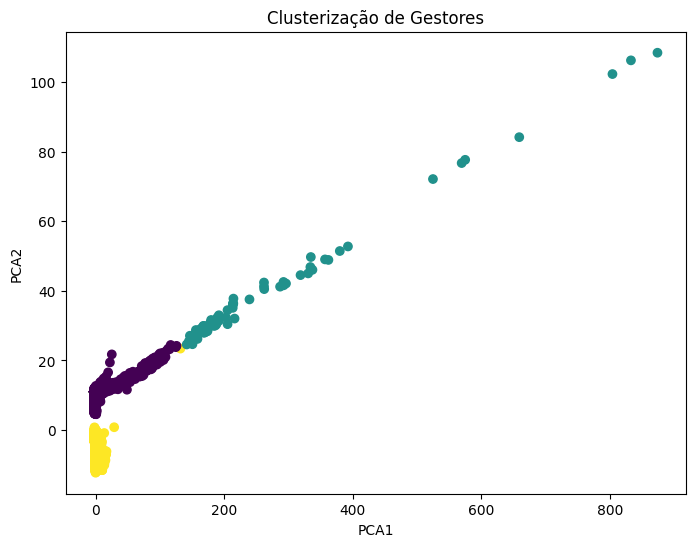

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusterização de Gestores')
plt.show()

In [45]:
explained_variance = pca.explained_variance_ratio_
print("Variância explicada por cada componente principal:", explained_variance)

Variância explicada por cada componente principal: [0.30044195 0.2146716 ]


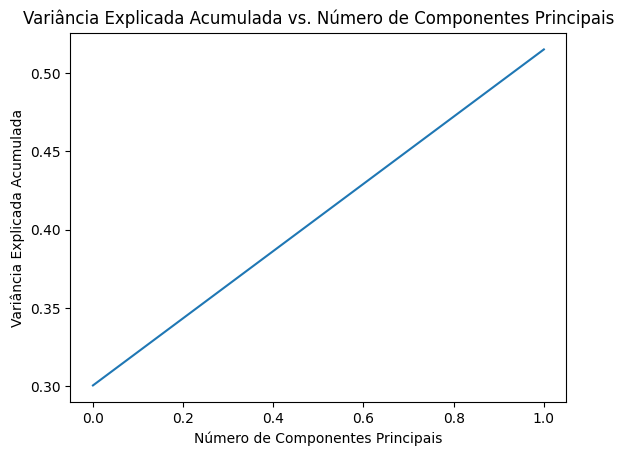

In [46]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada vs. Número de Componentes Principais')
plt.show()

In [47]:
loadings = pca.components_

loading_df = pd.DataFrame(loadings.T, index=feature_names, columns=[f'PC{i+1}' for i in range(loadings.shape[0])])
loading_df

,PC1,PC2
CMSS_GDP,-0.04,-0.03
pontos_oi,0.00,0.00
qt_oi,0.00,0.00
qt_oi_proced,0.00,0.00
qt_oi_nao_proced,0.00,0.00
nps,0.00,-0.00
qt_enps_respostas,-0.00,-0.00
qt_critico_enps,-0.00,0.00
dedips_andamento_mtn,-0.00,-0.00
dedips_concluidas_mtn,0.00,-0.01


In [48]:
# Mostrando as 5 variáveis mais influentes para os 10 principais componentes

for i in range(2):
    print(f"\nComponent {i+1}")
    print(loading_df.iloc[:, i].sort_values(ascending=False).head(5))


Component 1
jrdc_total_insignificante           0.12
jrdc_prefixo_diretoria              0.12
jrdc_manutencao_insignificante      0.12
jrdc_vp_melhorias_alerta            0.12
jrdc_vp_manutencao_insignificante   0.12
Name: PC1, dtype: float64

Component 2
enps_vp           0.08
enps_diretoria    0.07
enps_super        0.04
enps_regional     0.03
qt_subords_pref   0.03
Name: PC2, dtype: float64
